In [222]:
import pandas as pd
import matplotlib.pyplot as plt
from env import DATA_PATH

In [223]:
# IDs
file_path = DATA_PATH + 'lib_stats_bkp_musicbrainz_trackid.txt'
with open(file_path, 'r') as file:
    musicbrainz_trackid = file.read().splitlines()
# Rating
file_path = DATA_PATH + 'lib_stats_bkp_rating.txt'
with open(file_path, 'r') as file:
    ratings = file.read().splitlines()
# Score
file_path = DATA_PATH + 'lib_stats_bkp_score.txt'
with open(file_path, 'r') as file:
    score = file.read().splitlines()
# Genre
file_path = DATA_PATH + 'lib_stats_bkp_genre.txt'
with open(file_path, 'r') as file:
    genre = file.read().splitlines()

print(len(musicbrainz_trackid))
print(len(ratings))
print(len(score))
print(len(genre))



5555
5555
5555
5555


In [224]:
tmp_dict = {
    'mb_id': musicbrainz_trackid,
    'rating': ratings,
    'score': score,
    'genre': genre
}
df = pd.DataFrame(data=tmp_dict)

df['score'] = pd.to_numeric(df['score'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


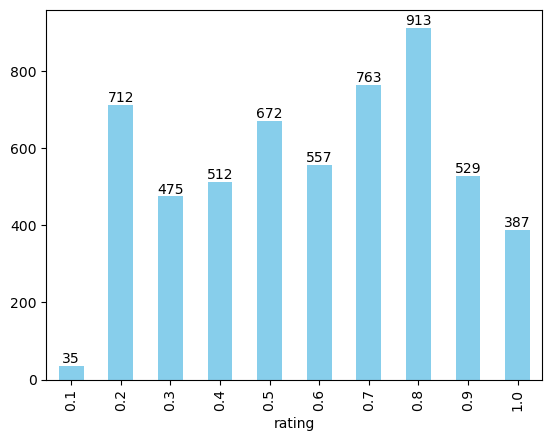

In [225]:


count_ratings = df['rating'].value_counts()
count_ratings = count_ratings.sort_index()

# print(count_ratings)
ax = count_ratings.plot(kind='bar', color='skyblue')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


In [226]:
df['score'].head()

0    55.288656
1    74.894140
2    30.654836
3    71.103917
4    62.838483
Name: score, dtype: float64

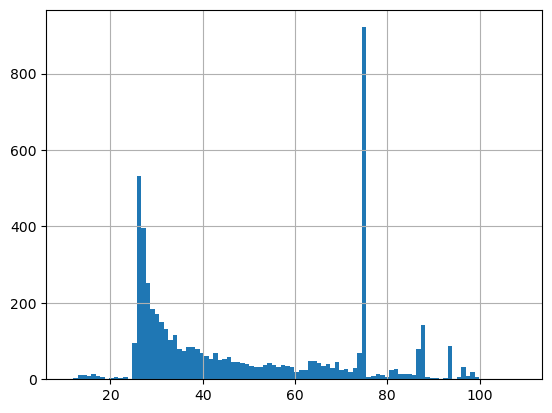

In [227]:
df['score'].hist(bins=100)
plt.show()

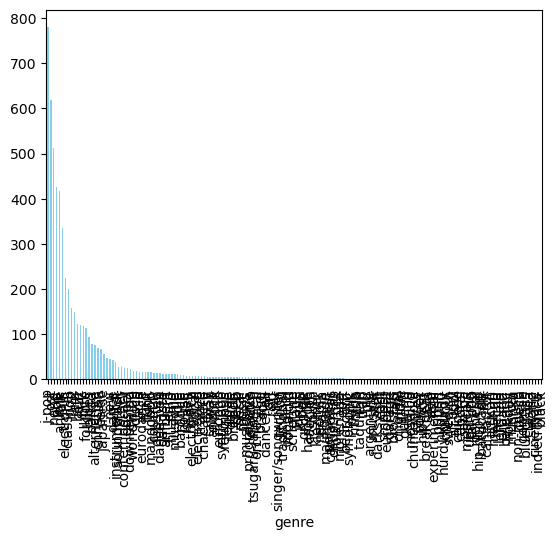

In [228]:
import re

# using only the first genre
df['genre'] = df['genre'].astype(str).apply(lambda x: re.split(r'[,\s]+', x)[0].lower())

count_genre = df['genre'].value_counts()
count_genre.plot(kind='bar', color='skyblue', legend=False)
plt.show()


In [229]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(count_genre)


genre
j-pop                780
ost                  619
none                 513
pop                  427
anime                418
folk                 334
electronic           224
classical            200
jpop                 158
hip                  149
latin                123
jazz                 120
rock                 117
folklore             114
blues                 93
ballad                77
alternative           76
christian             70
celtic                66
japanese              55
                      47
new                   45
dance                 43
instrumental          38
soundtrack            27
other                 27
contemporary          25
gospel                24
downtempo             22
worldwide             19
disco                 18
acid                  17
eurodance             17
hard                  15
funk                  15
mandopop              15
country               14
dubstep               14
dance-pop             13
gangsta            

In [230]:
from env import AUDIO_FEATURES_PATH

# Load Audio Features
df_audio_f = pd.read_csv(AUDIO_FEATURES_PATH + '/audio_features.csv')

In [231]:
print(len(df))
print(len(df_audio_f))

5555
5555


In [232]:
print(df.head())

                                  mb_id  rating      score  genre
0  8e4eca5e-934f-465c-9fa1-5c1fce307214     0.3  55.288656    ost
1  304a7535-30e0-4626-b339-4555f8046c64     0.8  74.894140    pop
2  68ae0868-6df3-3b3d-a883-c48b5bb41a1f     0.5  30.654836  j-pop
3  73cb966f-f4cc-3e73-a5aa-ed466884a588     0.3  71.103917    ost
4  7e1dd50e-ac71-3de8-af25-f6a85b263de3     0.2  62.838483   jpop


In [233]:
print(df_audio_f.head())

        rms       zcr  spectral_centroid  spectral_rolloff      mfcc_1  \
0  0.066213  0.050515        1108.505607       2118.935730 -319.510071   
1  0.213763  0.104116        2470.769895       5238.806272  -76.104576   
2  0.069926  0.100477        1996.385919       4054.575528 -211.983307   
3  0.049676  0.054614        1493.833741       2933.596154 -320.589783   
4  0.183518  0.059593        1619.721652       3567.990730 -150.664658   

       mfcc_2     mfcc_3     mfcc_4    mfcc_5     mfcc_6  ...  chroma_D#  \
0  136.444244  31.509218  18.474501  8.989936   9.065517  ...   0.200760   
1   78.784645  -5.089167  21.953657  3.700592   7.683420  ...   0.475159   
2   99.883514   0.632229  35.558777  7.199624  15.998766  ...   0.357732   
3  100.607826  -1.317982  13.468428 -0.805347   0.384592  ...   0.336912   
4  124.465500  15.487763  29.595844  6.263494   8.940257  ...   0.249611   

   chroma_E  chroma_F  chroma_F#  chroma_G  chroma_G#  chroma_A  chroma_A#  \
0  0.284257  0.23271

In [234]:
# diff = df['mbid'][~df['mbid'].isin(df_audio_f['mbid'])].values
# print(diff)

In [235]:
# merged_df = pd.merge(df, df_audio_f, on='mbid', how='inner')

merged_df = pd.concat([df, df_audio_f], axis=1)
print(len(merged_df))
print(merged_df.head())


5555
                                  mb_id  rating      score  genre       rms  \
0  8e4eca5e-934f-465c-9fa1-5c1fce307214     0.3  55.288656    ost  0.066213   
1  304a7535-30e0-4626-b339-4555f8046c64     0.8  74.894140    pop  0.213763   
2  68ae0868-6df3-3b3d-a883-c48b5bb41a1f     0.5  30.654836  j-pop  0.069926   
3  73cb966f-f4cc-3e73-a5aa-ed466884a588     0.3  71.103917    ost  0.049676   
4  7e1dd50e-ac71-3de8-af25-f6a85b263de3     0.2  62.838483   jpop  0.183518   

        zcr  spectral_centroid  spectral_rolloff      mfcc_1      mfcc_2  ...  \
0  0.050515        1108.505607       2118.935730 -319.510071  136.444244  ...   
1  0.104116        2470.769895       5238.806272  -76.104576   78.784645  ...   
2  0.100477        1996.385919       4054.575528 -211.983307   99.883514  ...   
3  0.054614        1493.833741       2933.596154 -320.589783  100.607826  ...   
4  0.059593        1619.721652       3567.990730 -150.664658  124.465500  ...   

   chroma_D#  chroma_E  chroma_F 

In [236]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mb_id              5555 non-null   object 
 1   rating             5555 non-null   float64
 2   score              5555 non-null   float64
 3   genre              5555 non-null   object 
 4   rms                5555 non-null   float64
 5   zcr                5555 non-null   float64
 6   spectral_centroid  5555 non-null   float64
 7   spectral_rolloff   5555 non-null   float64
 8   mfcc_1             5555 non-null   float64
 9   mfcc_2             5555 non-null   float64
 10  mfcc_3             5555 non-null   float64
 11  mfcc_4             5555 non-null   float64
 12  mfcc_5             5555 non-null   float64
 13  mfcc_6             5555 non-null   float64
 14  mfcc_7             5555 non-null   float64
 15  mfcc_8             5555 non-null   float64
 16  mfcc_9             5555 

In [237]:
merged_df = merged_df.replace(r'^\s*$', None, regex=True)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mb_id              5555 non-null   object 
 1   rating             5555 non-null   float64
 2   score              5555 non-null   float64
 3   genre              5508 non-null   object 
 4   rms                5555 non-null   float64
 5   zcr                5555 non-null   float64
 6   spectral_centroid  5555 non-null   float64
 7   spectral_rolloff   5555 non-null   float64
 8   mfcc_1             5555 non-null   float64
 9   mfcc_2             5555 non-null   float64
 10  mfcc_3             5555 non-null   float64
 11  mfcc_4             5555 non-null   float64
 12  mfcc_5             5555 non-null   float64
 13  mfcc_6             5555 non-null   float64
 14  mfcc_7             5555 non-null   float64
 15  mfcc_8             5555 non-null   float64
 16  mfcc_9             5555 

In [238]:
# diff = df['mbid'][~df['mbid'].isin(df_audio_f['mbid'])].values
# print(diff)
df_t = merged_df[merged_df['mb_id']!=merged_df['mbid']]
print(df_t)

Empty DataFrame
Columns: [mb_id, rating, score, genre, rms, zcr, spectral_centroid, spectral_rolloff, mfcc_1, mfcc_2, mfcc_3, mfcc_4, mfcc_5, mfcc_6, mfcc_7, mfcc_8, mfcc_9, mfcc_10, mfcc_11, mfcc_12, mfcc_13, chroma_C, chroma_C#, chroma_D, chroma_D#, chroma_E, chroma_F, chroma_F#, chroma_G, chroma_G#, chroma_A, chroma_A#, chroma_B, mbid]
Index: []

[0 rows x 34 columns]


In [239]:
# Binary Label
merged_df['like_label'] = merged_df['rating'].apply(lambda x: 1 if x>0.7 else 0)


In [240]:
merged_df["genre"] = merged_df["genre"].str.strip().astype("category")


In [241]:
merged_df.drop(['mbid'], axis=1, inplace=True)
merged_df.drop(['rating','score'], axis=1, inplace=True)



In [242]:
tmp_pickle = './data/datacollection__tmp.pkl'

print(merged_df.info(verbose=True, show_counts=True))
merged_df.to_pickle(tmp_pickle)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   mb_id              5555 non-null   object  
 1   genre              5508 non-null   category
 2   rms                5555 non-null   float64 
 3   zcr                5555 non-null   float64 
 4   spectral_centroid  5555 non-null   float64 
 5   spectral_rolloff   5555 non-null   float64 
 6   mfcc_1             5555 non-null   float64 
 7   mfcc_2             5555 non-null   float64 
 8   mfcc_3             5555 non-null   float64 
 9   mfcc_4             5555 non-null   float64 
 10  mfcc_5             5555 non-null   float64 
 11  mfcc_6             5555 non-null   float64 
 12  mfcc_7             5555 non-null   float64 
 13  mfcc_8             5555 non-null   float64 
 14  mfcc_9             5555 non-null   float64 
 15  mfcc_10            5555 non-null   float64 
 16  mfcc_1

In [243]:
%run test_train_splitter.py --input_data='./data/datacollection__tmp.pkl' --field='like_label' --test=0.33 --x_train='./data/x_train.pkl' --y_train='./data/y_train.pkl' --x_test='./data/x_test.pkl' --y_test='./data/y_test.pkl' --cat_ordinal_encoder='./data/cat_ordinal_encoder.pkl' --training_categories_array='./data/training_categories_array.pkl' --non_feature_fields='mb_id'


input_len: 5555
=========================================== CATEGORIES ENCODER INFO =====================================================
['genre']
-------------
[array(['NO_CAT_PLACEHOLDER', 'acid', 'african', 'alt-idol', 'alternative',
       'ambient', 'andina', 'anime', 'argentine', 'art', 'asia',
       'balearic', 'ballad', 'baroque', 'batucada', 'bedroom', 'big',
       'black', 'bluegrass', 'blues', 'bow', 'breakbeat', 'british',
       'britpop', 'brostep', 'canción', 'cantaditas', 'cantautor',
       'caporal', 'celtic', 'chacarera', 'chillout', 'chinese',
       'christian', 'christmas', 'chuntunqui', 'cinematic', 'classical',
       'clásica', 'contemporary', 'country', 'cueca', 'dance',
       'dance-pop', 'dancehall', 'darksynth', 'deep', 'disco',
       'downtempo', 'drama', 'drum', 'dubstep', 'east', 'easy', 'electro',
       'electronic', 'electronica', 'electropop', 'euro', 'eurobeat',
       'eurodance', 'europop', 'experimental', 'filk', 'folk',
       'folk-rock', 